# Exploration 01. 
### 인공지능과 가위바위보 하기
date: 2021.09.23

## 1. 딥러닝 생성 과정

데이터 준비 → 딥러닝 네트워크 설계 → 학습 → 테스트(평가)

---

## 2. 숫자 손글씨 인식기 만들기 (Sequential Model 이용)

### 2-1. Data 준비

- Dataset: MNIST 숫자 손글씨 불러오기

In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

60000


- **Matplotlib**
    
    - 파이썬에서 제공하는 시각화(Visualization) 패키지
    -  차트(chart), 플롯(plot) 등 다양한 형태로 데이터를 시각화할 수 있는 기능을 제공

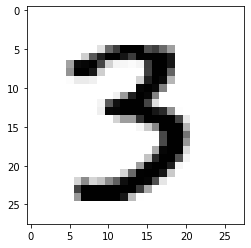

10001 번째 이미지의 숫자는 바로  3 입니다.


In [5]:
# 이미지 출력해보기
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [6]:
# 데이터양 확인
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


- **검증용 데이터(validataion set) 사용 이유**
    - 머신러닝 학습 과정이 정상적으로 진행되고 확인
    - 오버피팅이 발생하고 있지 않은지 확인
    - 학습을 중단해도 되는지 등을 확인

- **데이터 전처리**

     - 인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋다.
     
     - NIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됨

In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


---

### 2-2. 딥러닝 네트워크 설계

- **Sequential API (tf.keras)**
    
    - 개발의 자유도는 많이 떨어지지만, 매우 간단하게 딥러닝 모델을 만들어낼 수 있는 방법
    - 미리 정의된 딥러닝 레이어(layer)를 손쉽게 추가할 수 있음

<br>    

- **Conv2D 레이어**

    - 첫 인자: 이미지 특징의 수
    
 <br>   
 
- **Dense 레이어**

    - 첫 인자: 분류기에 사용되는 뉴런의 수
    -  마지막 Dense 레이어의 뉴런 수: 분류해내야 하는 클래스 수

<br> 

`model.summary()`: 딥러닝 네트워크 모델 확인




---
### 2-3. 딥러닝 네트워크 학습
- **네트워크 입력**: (데이터 개수, 이미지 크기 x, 이미지 크기 y, 채널 수)

In [ ]:
# data reshape (입력 형식에 맞게 조정)
# 데이터갯수에 -1을 쓰면 reshape시 자동계산
x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)


In [ ]:
# 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=10)

`epochs`: 학습 횟수

---
### 2-4. 성능 확인 (테스트)
- 시험용 데이터를 통해 성능을 확인
- 잘못 추론한 데이터 확인
    - `model.predict()`: model이 입력값을 보고 실제 추론한 확률 분포 출력
    

In [ ]:
# 테스트
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

In [ ]:
# 추론 데이터 확인하기

predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

---
### 2-5. 네트워크 개선

**하이퍼파라미터**를 변경하여 구조를 바꾸지 않고 인식률을 변화시킬 수 있다.

- 예제에서 변경해볼 수 있는 하이퍼파라미터
    - Conv2D 레이어의 입력 이미지 특징 수
    - Dense 레이어 뉴런수
    - epoch 값 (학습 반복 횟수)

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))